# Assignment 2 - NLP, Aris Tsilifonis mtn2323

## Word Embeddings

## Use pretrained word embeddings word2vec (word2vec-goole-news-300) and GloVe (glove-wiki-gigaword-300) that are included in gensim, to find similar words

In [ ]:
import gensim.downloader as gensimloader

In [ ]:
glove = gensimloader.load("glove-wiki-gigaword-300")
word2vec =  gensimloader.load("word2vec-google-news-300")

[==================================================] 100.0% 376.1/376.1MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

def find_top10_similar_words(pretmodels, keywords, num_results, use_analogy=False, negative=None, positive=None):

    # Validate optional arguments
    if positive is None:
        positive = []
    if negative is None:
        negative = []

    all_similar_words = []

    # Iterate over each model provided
    for model_id, model_type in pretmodels.items():
        # Initialize data structure to hold similarity results for all keywords
        keyword_similarities = {keyword: [] for keyword in keywords}

        # Process each keyword to find similar words
        for keyword in keywords:
            if use_analogy == False:
              additional_terms = [keyword]
            else:
              additional_terms = []

             # Check if model contains necessary terms
            terms_to_check = positive + negative + additional_terms
            missing_terms = [term for term in terms_to_check if term not in model_type.key_to_index]

            if not missing_terms:
                # Retrieve similarities if all terms are present
                similarities = model_type.most_similar(topn=num_results, positive=positive + additional_terms, negative=negative)
                keyword_similarities[keyword] = [f"{word}= {score:.5f}" for word, score in similarities]
            else:
                # Assign "No Answer" if any term is missing
                keyword_similarities[keyword] = ["No Answer"] * num_results


        # Prepare data for tabulating
        formatted_table = []
        for i in range(num_results):
            row = [keyword_similarities[keyword][i] for keyword in keywords]
            formatted_table.append(row)

        # Display the model name and the formatted table
        print(f"{model_id} model's table:")
        print(tabulate(formatted_table, headers=keywords, tablefmt='fancy_grid', numalign="left", stralign="left"))

        # Store only the words (not the scores) for further use
        all_similar_words.append([[(lambda x: x.strip().split('=')[0] if '=' in x else "No Answer")(result) for result in results]
        for keyword, results in keyword_similarities.items()])


    return all_similar_words

# Example usage
models_to_check = {'GloVe': glove, 'Word2vec': word2vec}
top10_similar_words = find_top10_similar_words(models_to_check,['facebook', 'jaguar', 'Jaguar', 'car'], 10)


GloVe model's table:
╒═════════════════════╤═══════════════════╤═══════════╤═════════════════════╕
│ facebook            │ jaguar            │ Jaguar    │ car                 │
╞═════════════════════╪═══════════════════╪═══════════╪═════════════════════╡
│ twitter= 0.83497    │ rover= 0.59313    │ No Answer │ cars= 0.78272       │
├─────────────────────┼───────────────────┼───────────┼─────────────────────┤
│ myspace= 0.80559    │ bmw= 0.54151      │ No Answer │ vehicle= 0.76554    │
├─────────────────────┼───────────────────┼───────────┼─────────────────────┤
│ youtube= 0.72918    │ mercedes= 0.52557 │ No Answer │ truck= 0.73506      │
├─────────────────────┼───────────────────┼───────────┼─────────────────────┤
│ blog= 0.64036       │ sepecat= 0.50300  │ No Answer │ driver= 0.71148     │
├─────────────────────┼───────────────────┼───────────┼─────────────────────┤
│ linkedin= 0.63325   │ mustang= 0.49867  │ No Answer │ driving= 0.64422    │
├─────────────────────┼───────────────────┼

## The tables above show the 10 most similar words of the given words "facebook","jaguar","Jaguar","car". The similar words are ranked based on their similarity score produced by GloVe and word2vec models. On this experiment only the keyword is used to determine similarity. Positive and negative context words and analogies are not utilised. GloVe shows "twitter" , "myspace" as most similar words for "facebook" while word2vec "Facebook", "FaceBook". GloVe's scores are higher than word2vec's ones for the top-2 most simlar words. It can be understood that GloVe can capture similar words that are sigificantly not related to the original keyword. On the other hand, word2vec finds as most similar word to "facebook" words that are highly related to the original keyword. The way that those models were trained has great influence on the similarity outcome. Those small differentiations( only some capital letters) can play a critical role on several situations and can be very important.

In [ ]:
print(top10_similar_words)

[[['twitter', 'myspace', 'youtube', 'blog', 'linkedin', 'google', 'website', 'web', 'blogs', 'networking'], ['rover', 'bmw', 'mercedes', 'sepecat', 'mustang', 'lexus', 'volvo', 'cosworth', 'xk', 'maserati'], ['No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer', 'No Answer'], ['cars', 'vehicle', 'truck', 'driver', 'driving', 'vehicles', 'motorcycle', 'automobile', 'parked', 'drivers']], [['Facebook', 'FaceBook', 'twitter', 'myspace', 'Twitter', 'twitter_facebook', 'Facebook.com', 'myspace_facebook', 'facebook_twitter', 'linkedin'], ['jaguars', 'Macho_B', 'panther', 'lynx', 'rhino', 'lizard', 'tapir', 'tiger', 'leopard', 'Florida_panther'], ['Land_Rover', 'Aston_Martin', 'Mercedes', 'Porsche', 'BMW', 'Bentley_Arnage', 'XF_sedan', 'Audi', 'Jaguar_XF', 'XJ_saloon'], ['vehicle', 'cars', 'SUV', 'minivan', 'truck', 'Car', 'Ford_Focus', 'Honda_Civic', 'Jeep', 'pickup_truck']]]


# Find Common Words of GloVe and word2vec models in all of the collections that were produced previously

In [ ]:
def find_common_words(all_similar_words, keywords):
    # Dictionary to hold common words for each keyword
    common_words_per_keyword = {keyword: [] for keyword in keywords}

    # Compare results for each keyword across models
    for keyword_index, keyword in enumerate(keywords):
        # Collect all lists of words for this keyword from different models
        lists_of_words = [model_results[keyword_index] for model_results in all_similar_words]

        # Find the intersection of all lists to get the common words
        common_words = set(lists_of_words[0])
        for words in lists_of_words[1:]:
            common_words.intersection_update(words)

        # Store the common words in the dictionary
        common_words_per_keyword[keyword] = list(common_words)

    return common_words_per_keyword

common_words = find_common_words(top10_similar_words, ['facebook', 'jaguar', 'Jaguar', 'car'])

# Print common words for each keyword
for keyword, words in common_words.items():
    print(f"Common words for '{keyword}': {words}")


Common words for 'facebook': ['twitter', 'myspace', 'linkedin']
Common words for 'jaguar': []
Common words for 'Jaguar': []
Common words for 'car': ['vehicle', 'cars', 'truck']


# Find similarity of words choosed by the user

## These words are based on "Game of thrones" TV-series. It can be observed that "weapon" produce accurate similaries on both of the models. "Hilt" does not produce any similarities in GloVe. This word starts with capital letter, so word2vec finds some names that are related in some way with it. This showcases some deficiencies of GloVe's pretrained embeddings(maybe this word was not included in the original train dataset). Regarding "hilt" word, GloVe is producing more similar words that word2vec. We drew this conclusion by understanding the meaning of the words, since sword is more related to hilt than shamelessly(logically). Stark is a character in GoT series  but it can have other meanings too. Both models capture some reasonable similarity.

In [ ]:
top10_similar_words2 = find_top10_similar_words(models_to_check ,['hilt', 'Hilt', 'weapon', 'stark'], 10)

GloVe model's table:
╒═════════════════════╤═══════════╤═════════════════════╤════════════════════╕
│ hilt                │ Hilt      │ weapon              │ stark              │
╞═════════════════════╪═══════════╪═════════════════════╪════════════════════╡
│ scabbard= 0.52840   │ No Answer │ weapons= 0.75726    │ starkly= 0.52564   │
├─────────────────────┼───────────┼─────────────────────┼────────────────────┤
│ sword= 0.47779      │ No Answer │ weaponry= 0.58211   │ reminder= 0.51579  │
├─────────────────────┼───────────┼─────────────────────┼────────────────────┤
│ blade= 0.39571      │ No Answer │ gun= 0.57787        │ contrast= 0.50670  │
├─────────────────────┼───────────┼─────────────────────┼────────────────────┤
│ bayonet= 0.37399    │ No Answer │ firearm= 0.55671    │ grim= 0.48120      │
├─────────────────────┼───────────┼─────────────────────┼────────────────────┤
│ bladed= 0.37329     │ No Answer │ ammunition= 0.53071 │ contrasts= 0.47736 │
├─────────────────────┼────────

## Find common words on this occasion

In [ ]:
common_words2 = find_common_words(top10_similar_words2, ['hilt', 'Hilt', 'weapon', 'stark'])

# Print common words for each keyword
for keyword, words in common_words2.items():
    print(f"Common words for '{keyword}': {words}")


Common words for 'hilt': []
Common words for 'Hilt': []
Common words for 'weapon': ['weapons', 'pistol', 'firearm', 'guns', 'gun', 'weaponry']
Common words for 'stark': ['bleak', 'vivid', 'sobering', 'starkly', 'grim']


## Find the 10 most closely related words to "student"

In [ ]:
top10_similar_words3 = find_top10_similar_words(models_to_check, ['student'], 10)

GloVe model's table:
╒════════════════════════╕
│ student                │
╞════════════════════════╡
│ students= 0.76909      │
├────────────────────────┤
│ teacher= 0.68737       │
├────────────────────────┤
│ graduate= 0.67376      │
├────────────────────────┤
│ school= 0.61306        │
├────────────────────────┤
│ college= 0.60903       │
├────────────────────────┤
│ undergraduate= 0.60438 │
├────────────────────────┤
│ faculty= 0.59990       │
├────────────────────────┤
│ university= 0.59705    │
├────────────────────────┤
│ academic= 0.58101      │
├────────────────────────┤
│ campus= 0.57677        │
╘════════════════════════╛
Word2vec model's table:
╒═════════════════════════╕
│ student                 │
╞═════════════════════════╡
│ students= 0.72949       │
├─────────────────────────┤
│ Student= 0.67067        │
├─────────────────────────┤
│ teacher= 0.63014        │
├─────────────────────────┤
│ stu_dent= 0.62410       │
├─────────────────────────┤
│ faculty= 0.60873        

The common words of those two collections

In [ ]:
common_words3 = find_common_words(top10_similar_words3, ['student'])

# Print common words for each keyword
for keyword, words in common_words3.items():
    print(f"Common words for '{keyword}': {words}")

Common words for 'student': ['teacher', 'school', 'university', 'undergraduate', 'students', 'faculty']


Find the top 10 similar words of "student". They should not be related to word "university"

In [ ]:
top10_similar_words4 = find_top10_similar_words(models_to_check, ['student'], 10, negative=['university'])

GloVe model's table:
╒══════════════════════╕
│ student              │
╞══════════════════════╡
│ 15-year= 0.38301     │
├──────────────────────┤
│ 16-year= 0.38149     │
├──────────────────────┤
│ 17-year= 0.37853     │
├──────────────────────┤
│ 14-year= 0.37658     │
├──────────────────────┤
│ 13-year-old= 0.37302 │
├──────────────────────┤
│ 14-year-old= 0.36760 │
├──────────────────────┤
│ 9-year= 0.36668      │
├──────────────────────┤
│ 16-year-old= 0.36154 │
├──────────────────────┤
│ 15-year-old= 0.35097 │
├──────────────────────┤
│ 12-year-old= 0.34897 │
╘══════════════════════╛
Word2vec model's table:
╒══════════════════════════╕
│ student                  │
╞══════════════════════════╡
│ sixth_grader= 0.43236    │
├──────────────────────────┤
│ seventh_grader= 0.41784  │
├──────────────────────────┤
│ 8th_grader= 0.41733      │
├──────────────────────────┤
│ eighth_grader= 0.40815   │
├──────────────────────────┤
│ grader= 0.39714          │
├──────────────────────────┤
│ k

## We observe that the two collections produced by the models are completely different. On the other hand, the results are reasonable. All of the words are related to "student" and not to "university". For instance, Mario_Anzuoni is a a professional photographer (word produced by GloVe). It has to be noted that most of the produced words are not very well known.

In [ ]:
common_words4 = find_common_words(top10_similar_words4, ['student'])

# Print common words for each keyword
for keyword, words in common_words4.items():
    print(f"Common words for '{keyword}': {words}, not correlated with 'university'")

Common words for 'student': [], not correlated with 'university'


On this occasion, we want to find students do not belong in elementary, secondary of higher education. The outcome is deemed reasonable since all of the retrieved words are mostly people who are not related to those stages of education currently.

In [ ]:
models_to_check2 = {'Word2vec': word2vec}

top2_similar_words5 = find_top10_similar_words(models_to_check2 , ['student'], 10, negative=['elementary','secondary','high'])

Word2vec model's table:
╒══════════════════════════════════════════════════════════════════════════╕
│ student                                                                  │
╞══════════════════════════════════════════════════════════════════════════╡
│ ----------_-----------------------------------------------_GS##= 0.33800 │
├──────────────────────────────────────────────────────────────────────────┤
│ K.Kahne_###-###= 0.28100                                                 │
├──────────────────────────────────────────────────────────────────────────┤
│ Email_info@steelcloud.com= 0.27543                                       │
├──────────────────────────────────────────────────────────────────────────┤
│ Obiter_Dicta= 0.25279                                                    │
├──────────────────────────────────────────────────────────────────────────┤
│ Mario_Anzuoni_REUTERS= 0.24803                                           │
├───────────────────────────────────────────────────

In [ ]:
models_to_check3 = {'GloVe': glove}

top2_similar_words6 = find_top10_similar_words(models_to_check3 , ['student'], 10, negative=['elementary','secondary','high'])

GloVe model's table:
╒══════════════════════╕
│ student              │
╞══════════════════════╡
│ farzaneh= 0.38185    │
├──────────────────────┤
│ n-noreaga= 0.36106   │
├──────────────────────┤
│ kartel= 0.35846      │
├──────────────────────┤
│ pitambar= 0.35844    │
├──────────────────────┤
│ mixologist= 0.35170  │
├──────────────────────┤
│ zachariadis= 0.35007 │
├──────────────────────┤
│ miyachi= 0.34684     │
├──────────────────────┤
│ him/herself= 0.34590 │
├──────────────────────┤
│ mohmmed= 0.34185     │
├──────────────────────┤
│ mavado= 0.34027      │
╘══════════════════════╛


## Missing words in analogies

To solve analogies of this kind, we pass the analogy as a list to the model, while identifying the positive and negative context words. We aim to discover a word that bears the same relation to 'woman' as 'man' does to 'king'.
We leave out 'man' from this list since we intend to find a replacement for it.

In [ ]:
top2_similar_words7 = find_top10_similar_words(models_to_check2, ['king - man + woman'], 2, negative=['man'], positive=['king','woman'], use_analogy=True)

Word2vec model's table:
╒══════════════════════╕
│ king - man + woman   │
╞══════════════════════╡
│ queen= 0.71182       │
├──────────────────────┤
│ monarch= 0.61897     │
╘══════════════════════╛


In [ ]:
top2_similar_words8 = find_top10_similar_words(models_to_check3, ['king - man + woman'], 2, negative=['man'], positive=['king','woman'], use_analogy=True)

GloVe model's table:
╒══════════════════════╕
│ king - man + woman   │
╞══════════════════════╡
│ queen= 0.67133       │
├──────────────────────┤
│ princess= 0.54326    │
╘══════════════════════╛


Man is related to the king as woman is to whom? The reasonable output is queen, which is produced by both of the models. Argument use_analogy is defined as True because this plays a role in which terms we will check.

In [ ]:
top2_similar_words9 = find_top10_similar_words(models_to_check2, ['France - Paris + Tokyo'], 2, negative=['Paris'], positive=['France','Tokyo'], use_analogy=True)

Word2vec model's table:
╒══════════════════════════╕
│ France - Paris + Tokyo   │
╞══════════════════════════╡
│ Japan= 0.81678           │
├──────────────────────────┤
│ Japanese= 0.64809        │
╘══════════════════════════╛


In [ ]:
top2_similar_words10 = find_top10_similar_words(models_to_check3, ['France - Paris + Tokyo'], 2, negative=['Paris'], positive=['France','Tokyo'], use_analogy=True)

GloVe model's table:
╒══════════════════════════╕
│ France - Paris + Tokyo   │
╞══════════════════════════╡
│ No Answer                │
├──────────────────────────┤
│ No Answer                │
╘══════════════════════════╛


In [ ]:
top2_similar_words11 = find_top10_similar_words(models_to_check3, ['france - paris + tokyo'], 2, negative=['paris'], positive=['france','tokyo'], use_analogy=True)

GloVe model's table:
╒══════════════════════════╕
│ france - paris + tokyo   │
╞══════════════════════════╡
│ japan= 0.80168           │
├──────────────────────────┤
│ japanese= 0.61106        │
╘══════════════════════════╛


' France - Paris + Tokyo ' is used as keyword, with positive relationship as 'France,Tokyo' and negative 'Paris'. Paris is related to France as Tokyo is to what. Of course, Tokyo is the capital of Japan, which is the output of the models. Word2vec scores are more confident than those of glove's. We had to lowercase the characters in this analogy because glove was not able to solve it using the initial phrase with capital letters.

In [ ]:
top2_similar_words12 = find_top10_similar_words(models_to_check2, ['trees - apples + grapes'], 2, negative=['apples'], positive=['trees','grapes'], use_analogy=True)

Word2vec model's table:
╒═══════════════════════════╕
│ trees - apples + grapes   │
╞═══════════════════════════╡
│ oak_trees= 0.67495        │
├───────────────────────────┤
│ vines= 0.67017            │
╘═══════════════════════════╛


Apples are related to trees as grapes is to what? Both results are reasonable.

In [ ]:
top2_similar_words13 = find_top10_similar_words(models_to_check3, ['trees - apples + grapes'], 2, negative=['apples'], positive=['trees','grapes'], use_analogy=True)

GloVe model's table:
╒═══════════════════════════╕
│ trees - apples + grapes   │
╞═══════════════════════════╡
│ vines= 0.59093            │
├───────────────────────────┤
│ tree= 0.58429             │
╘═══════════════════════════╛


walking is related to swimming as walked ? Word2Vec's results are more accurate than GloVe's but they are both reasonable.  (Word2Vec returns verbs that are related to swimming while GloVe returns a noun)

In [ ]:
top2_similar_words14 = find_top10_similar_words(models_to_check2, ['swimming - walking + walked'], 2, negative=['walking'], positive=['swimming','walked'], use_analogy=True)

Word2vec model's table:
╒═══════════════════════════════╕
│ swimming - walking + walked   │
╞═══════════════════════════════╡
│ swam= 0.69259                 │
├───────────────────────────────┤
│ swim= 0.67250                 │
╘═══════════════════════════════╛


In [ ]:
top2_similar_words15 = find_top10_similar_words(models_to_check3, ['swimming - walking + walked'], 2, negative=['walking'], positive=['swimming','walked'], use_analogy=True)

GloVe model's table:
╒═══════════════════════════════╕
│ swimming - walking + walked   │
╞═══════════════════════════════╡
│ swam= 0.49780                 │
├───────────────────────────────┤
│ swimmers= 0.48521             │
╘═══════════════════════════════╛


Father is related to doctor as mother it to whom? We exprected that the word that solves this analogy is "doctor" but suprisingly is "nurse". This might be because there are more mothers which are nurses than doctors in the original train dataset.

In [ ]:
top2_similar_words16 = find_top10_similar_words(models_to_check2, ['doctor - father + mother'], 2, negative=['father'], positive=['doctor','mother'], use_analogy=True)

Word2vec model's table:
╒════════════════════════════╕
│ doctor - father + mother   │
╞════════════════════════════╡
│ nurse= 0.71279             │
├────────────────────────────┤
│ doctors= 0.65933           │
╘════════════════════════════╛


In [ ]:
top2_similar_words17 = find_top10_similar_words(models_to_check3, ['doctor - father + mother'], 2, negative=['father'], positive=['doctor','mother'], use_analogy=True)

GloVe model's table:
╒════════════════════════════╕
│ doctor - father + mother   │
╞════════════════════════════╡
│ nurse= 0.65703             │
├────────────────────────────┤
│ doctors= 0.61718           │
╘════════════════════════════╛


## Analogies defined by the user



Guitar is related to rock as piano is to? The expected words were classic or jazz. As a result, word2vec's results are more reasonable than GloVe's.

In [ ]:
top2_similar_words18 = find_top10_similar_words(models_to_check2, ['rock — guitar + piano'], 2, negative=['guitar'], positive=['rock','piano'], use_analogy=True)

Word2vec model's table:
╒══════════════════════════╕
│ rock — guitar + piano    │
╞══════════════════════════╡
│ jazz= 0.50136            │
├──────────────────────────┤
│ station_WHJY_FM= 0.47569 │
╘══════════════════════════╛


In [ ]:
top2_similar_words19 = find_top10_similar_words(models_to_check3, ['rock — guitar + piano'], 2, negative=['guitar'], positive=['rock','piano'], use_analogy=True)

GloVe model's table:
╒═════════════════════════╕
│ rock — guitar + piano   │
╞═════════════════════════╡
│ music= 0.51683          │
├─────────────────────────┤
│ concert= 0.48200        │
╘═════════════════════════╛


Rock is related to guitar as jass it to saxophone/piano. Both model's results are accurate, but word2vec has learned the relationship better. Its score(75%) is higher than the one of GloVe's(65%).

In [ ]:
top2_similar_words20 = find_top10_similar_words(models_to_check2, ['guitar — rock + jazz'], 2, negative=['rock'], positive=['guitar','jazz'], use_analogy=True)

Word2vec model's table:
╒════════════════════════╕
│ guitar — rock + jazz   │
╞════════════════════════╡
│ saxophone= 0.74873     │
├────────────────────────┤
│ sax= 0.71397           │
╘════════════════════════╛


In [ ]:
top2_similar_words21 = find_top10_similar_words(models_to_check3, ['guitar — rock + jazz'], 2, negative=['rock'], positive=['guitar','jazz'], use_analogy=True)

GloVe model's table:
╒════════════════════════╕
│ guitar — rock + jazz   │
╞════════════════════════╡
│ piano= 0.65337         │
├────────────────────────┤
│ saxophone= 0.64261     │
╘════════════════════════╛


Barcelona is related to football as athens is related to basketball. Both models indicate similar learning scores. The expected words were basketball or soccer, which are produced by word2vec.

In [ ]:
top2_similar_words22 = find_top10_similar_words(models_to_check2, ['football — barcelona + athens'], 2, negative=['barcelona'], positive=['football','athens'], use_analogy=True)

Word2vec model's table:
╒═════════════════════════════════╕
│ football — barcelona + athens   │
╞═════════════════════════════════╡
│ basketball= 0.54082             │
├─────────────────────────────────┤
│ soccer= 0.53506                 │
╘═════════════════════════════════╛


In [ ]:
top2_similar_words23 = find_top10_similar_words(models_to_check3, ['football — barcelona + athens'], 2, negative=['barcelona'], positive=['football','athens'], use_analogy=True)

GloVe model's table:
╒═════════════════════════════════╕
│ football — barcelona + athens   │
╞═════════════════════════════════╡
│ basketball= 0.52758             │
├─────────────────────────────────┤
│ greek= 0.50150                  │
╘═════════════════════════════════╛


# Visualize vectors of a given set of words with t-SNE library

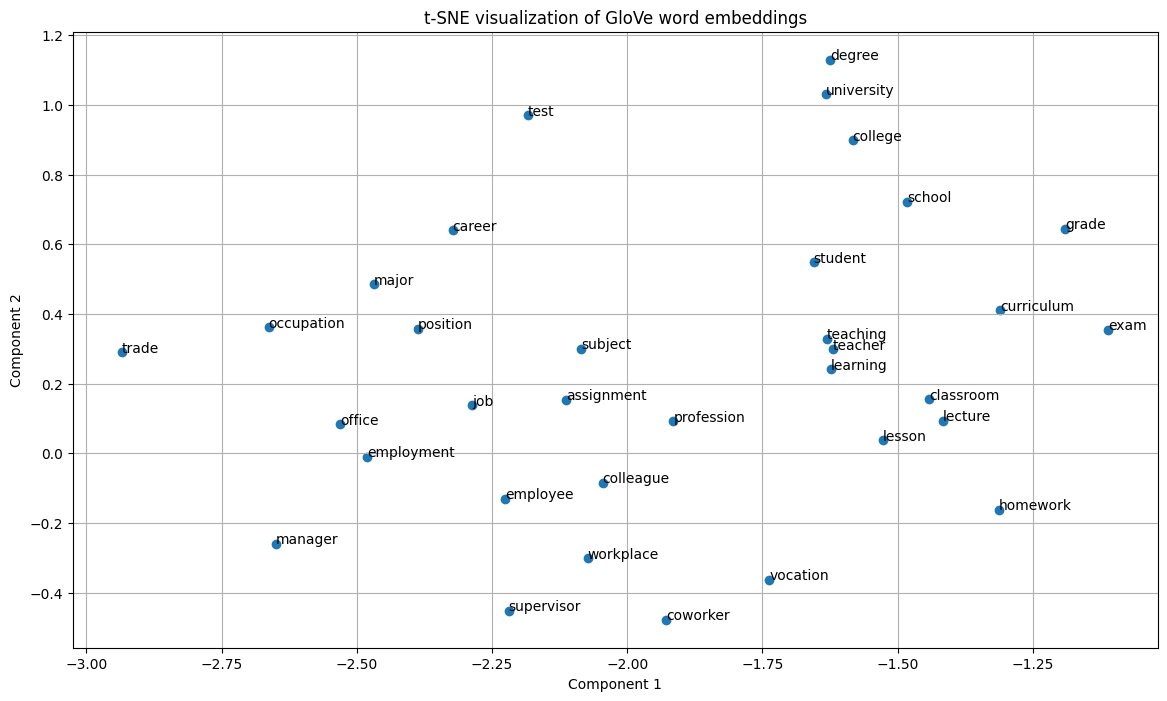

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Words for which we need to retrieve embeddings and visualize
words = [
    'assignment', 'exam', 'career', 'classroom', 'colleague', 'college', 'coworker', 'curriculum',
    'degree', 'employee', 'employment', 'grade', 'homework', 'job', 'learning', 'lecture', 'lesson',
    'major', 'manager', 'occupation', 'office', 'position', 'profession', 'school', 'student', 'subject',
    'supervisor', 'teacher', 'teaching', 'test', 'trade', 'university', 'vocation', 'workplace'
]

# Retrieve the associated vectors for our selected words
word_vectors = np.array([glove[word] for word in words if word in glove])

# Perform t-SNE dimensionality reduction to transform the vectors into 2D space
tsne = TSNE(n_components=2, init='pca',n_iter=5000, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the results of t-SNE
plt.figure(figsize=(14, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate the points on the graph with the words themselves
for i, word in enumerate(words):
    if word in glove:
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Add grid, title and labels
plt.grid(True)
plt.title('t-SNE visualization of GloVe word embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Showing the plot
plt.show()


Below, we optimize the parameters to achieve better clustering of the vectors. PCA is utilised to find the principal componets of the vectors(most important ones, they capture more information). Perplexity value of 2 fits the dataset better in this case.  

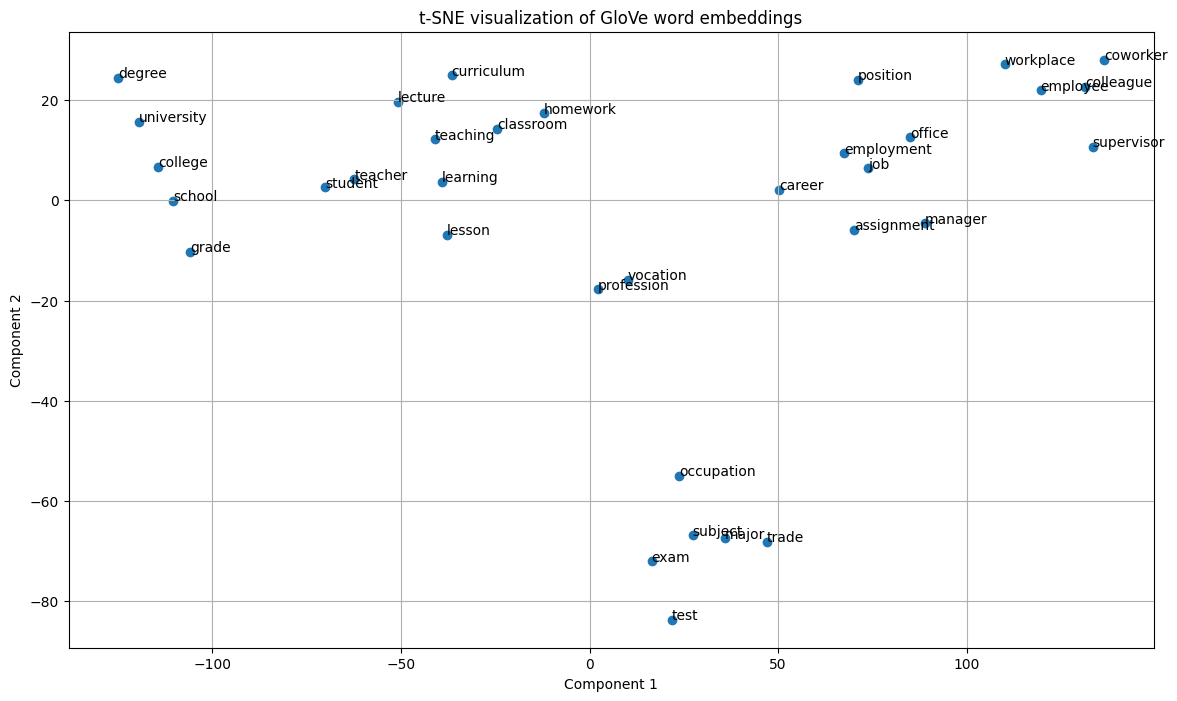

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Words for which we need to retrieve embeddings and visualize
words = [
    'assignment', 'exam', 'career', 'classroom', 'colleague', 'college', 'coworker', 'curriculum',
    'degree', 'employee', 'employment', 'grade', 'homework', 'job', 'learning', 'lecture', 'lesson',
    'major', 'manager', 'occupation', 'office', 'position', 'profession', 'school', 'student', 'subject',
    'supervisor', 'teacher', 'teaching', 'test', 'trade', 'university', 'vocation', 'workplace'
]

# Retrieve the associated vectors for our selected words
word_vectors = np.array([glove[word] for word in words if word in glove])

# Perform t-SNE dimensionality reduction to transform the vectors into 2D space
tsne = TSNE(n_components=2, init='pca',n_iter=5000,random_state=0, perplexity=2)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the results of t-SNE
plt.figure(figsize=(14, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate the points on the graph with the words themselves
for i, word in enumerate(words):
    if word in glove:
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Add grid, title and labels
plt.grid(True)
plt.title('t-SNE visualization of GloVe word embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Showing the plot
plt.show()


We observe five clusters in this case. The first one is on the upper left of the diagram, which includes degree, university, college, grade and school. The second is on the right of the previous one. Words such as lesson, classroom, homework, teaching, curriculum belong to this cluster. There are some outliers at the center of the diagram, namely vacation and occupation which are related very closely. The third cluster in at the bottom of the diagram. There, words like major, occupation and test are included. Most of them are correlated logically. The fourth cluster is on the top-right corner of the picture. It includes words such as supervisor and workplace. The last one is exactly on the left of the one mentioned before. It concerns employment, manager and assignment. In conclusion, by fine-tuning the parameters of t-SNE we achieve  more accurate clustering of the vectors